# This first section is for setting up the enviornment

In [1]:
# Setting up the enviornment for GOOGLE COLAB, deepaugment only works with old Tensorflow versions
# version of Tensorflow needed: 1.12
# version of CUDA: 9.0
!wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
!apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub
!apt-get update
!apt-get install cuda=9.0.176-1

--2019-05-15 08:39:50--  https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 192.229.162.216
Connecting to developer.nvidia.com (developer.nvidia.com)|192.229.162.216|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.0/secure/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64.deb?QLA35DzaiywQd-A4BWIyfMjge-iXtDnfveZ61rfWXDS8u26U85IRDwSkbp1Bz8Vqla7luicy_PSeIACxFNOV01wO_ZQfrtc23s4CdDfqPM-_JjFDMm8l7dGWEnjxzsOYnF0n01ooxbB5Sl6esfnX6PmyNsh12tzLYVM2y-6gCEYBK7PJQfxjMEgpahSLJpBPFNIioiH0CduvOQjxk2ys [following]
--2019-05-15 08:39:51--  https://developer.download.nvidia.com/compute/cuda/9.0/secure/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64.deb?QLA35DzaiywQd-A4BWIyfMjge-iXtDnfveZ61rfWXDS8u26U85IRDwSkbp1Bz8Vqla7luicy_PSeIACxFNOV01wO_ZQfrtc23s4CdDfqPM-_Jj

In [2]:
!pip install deepaugment

     |████████████████████████████████| 645kB 7.8MB/s 
     |████████████████████████████████| 573kB 51.1MB/s 
     |████████████████████████████████| 51kB 25.9MB/s 
     |████████████████████████████████| 8.9MB 50.4MB/s 
     |████████████████████████████████| 13.9MB 40.6MB/s 
     |████████████████████████████████| 81kB 34.2MB/s 
     |████████████████████████████████| 83.1MB 51.4MB/s 
     |████████████████████████████████| 12.9MB 32.2MB/s 
     |████████████████████████████████| 3.1MB 32.2MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.7 which is incompatible.
  Found existing installation: numpy 1.16.3
    Uninstalling numpy-1.16.3:
      Successfully uninstalled numpy-1.16.3
  Found existing installation: matplot

In [1]:
!pip uninstall tensorflow tensorflow-estimator tensorboard tensorflow-hub
!pip install tensorflow-gpu==1.12
!apt-get install python3-pydot graphviz

Uninstalling tensorflow-1.12.0:
  Would remove:
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.12.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.12.0
Uninstalling tensorflow-estimator-1.13.0:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/tensorflow_estimator-1.13.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_estimator/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-estimator-1.13.0
Uninstalling tensorboard-1.12.2:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/tensorboard-1.12.2.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorboard/*
Proceed (y/n)? y
  Successfully uninstalled tensorboard-1.12.2
Uninstalling tensorflow-hub-0.4.0:
  Would remo

In [2]:
!pip install --upgrade pillow

     |████████████████████████████████| 2.0MB 2.8MB/s 
ERROR: magenta 0.3.19 requires tensorflow>=1.12.0, which is not installed.
ERROR: deepaugment 1.1.2 requires tensorflow==1.12.0, which is not installed.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.7 which is incompatible.
  Found existing installation: Pillow 4.3.0
    Uninstalling Pillow-4.3.0:
      Successfully uninstalled Pillow-4.3.0


In [1]:
from deepaugment.deepaugment import DeepAugment
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.layers.noise import GaussianNoise
import pandas as pd
import matplotlib.pyplot as plt
import time, pickle
import tensorflow as tf
from keras import backend as K
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 20,20
from keras import optimizers
from augmenter import transform, augment_by_policy
from sklearn.metrics import confusion_matrix
import seaborn as sn
import PIL
from keras.models import load_model
import os
from google.colab import files

# From autoaugment github https://github.com/DeepVoltaire/AutoAugment
from autoaugment import CIFAR10Policy

%matplotlib inline

Using TensorFlow backend.


In [2]:
# Checking if tensorflow is actually using the GPU
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2489403779624177911
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 7193703545335093514
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 15487134272052723211
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14808662016
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12331350221912026519
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [0]:
config  = tf.ConfigProto()
config.gpu_options.allow_growth =True
sess = tf.Session(config=config)

In [4]:
# Checking  the gpus we are using
!nvidia-smi

Wed May 15 08:44:56 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.56       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0    28W /  70W |    213MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

# Functions

In [0]:
# INITIALAZATION OF FUNCTIONS

def train_test_split(n_classes = 2, augment= False, length_dataset = 2000, transformed = False):
  '''This function splits the dataset in different ways, we can select the number of classes, 
  the length of the dataset and specify if the next step is to perform auto augmentation or not. 
  augment = True indicates that there is no need to convert y to categorical because the library
  transforms it automatically.'''
  (x_train, y_train), (x_test, y_test) = cifar10.load_data()

  # Selecting only n_classes
  new_x_train = []
  new_y_train = []
  new_x_test = []
  new_y_test = []
  length_d = 0
  
  for i in range(len(x_train)):
    if y_train[i] in list(range(n_classes)):
      new_x_train.append(x_train[i].tolist())
      new_y_train.append(y_train[i].tolist())
      length_d += 1
    if length_d == length_dataset:
      break
      
  length_test = 0.4*length_dataset
  length_d = 0
  for i in range(len(x_test)):
    if y_test[i] in list(range(n_classes)):
      new_x_test.append(x_test[i].tolist())
      new_y_test.append(y_test[i].tolist())
      length_d += 1
    if length_d == length_test:
      break
  
  
  y_train = np.asarray(new_y_train)
  x_train = np.asarray(new_x_train)
  y_test = np.asarray(new_y_test)
  x_test = np.asarray(new_x_test)

  
  # Using Auto_Augment policies from Google
  if transformed:
    policy = CIFAR10Policy()
    for i in range(len(x_train)):
      img = PIL.Image.fromarray(x_train[i].astype(np.uint8))
      image = policy(img)
      x_train = np.append(x_train, [np.asarray(image).tolist()], axis =0)
      y_train = np.append(y_train, [y_train[i].tolist()], axis =0)    
  
  y_train = y_train.reshape(y_train.shape[0]) 
  y_test = y_test.reshape(y_test.shape[0])

  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  x_train /= 255
  x_test /= 255

  if not augment:
    y_train = np_utils.to_categorical(y_train, n_classes)
    y_test = np_utils.to_categorical(y_test, n_classes)
    
  unique, counts = np.unique(y_train, return_counts=True)
  print('CLASSES SPLIT CONTAINS:\n\
  {} total samples\n\
  With {} classes \n\
  That have the following distribution: {}'.format(len(x_train),len(counts),counts))
  return (x_train, y_train),(x_test, y_test)

class_name = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}


def draw_img(array, clas, title=True):
  '''This function shows an image from a numpy array and plots its class as a title'''
  im = array
  c = clas
  plt.imshow(im)
  if title:
    plt.title("Class {}: {}".format(c, class_name[c]))
  plt.axis('off')

def draw_sample(X, y, n, rows=4, cols=4, imfile=None, fontsize=12, augment= False):
  '''This function draws a sample of the data set'''
  fig = plt.figure()
  for i in range(0, rows*cols):
      ax = fig.add_subplot(rows, cols, i+1)
      im = X[n+i].reshape(32,32,3)
      ax.imshow(im, cmap='gnuplot2')
      if augment == False:
        ax.set_title("{}".format(class_name[np.where(y[n+i] == 1)[0][0]]), fontsize=fontsize)
      else:
        ax.set_title("{}".format(class_name[y[n+i]]), fontsize=fontsize)

      fig.tight_layout(pad=1)
      ax.axis('off')
  if imfile:
      ax.savefig(imfile)
        
        
def plotLosses(history):  
  '''Plotting losses and accuracy of the training process of the neural network'''
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
    
# Showing policies in a picture

def draw_policies_image(x, y, a,imfile=None, fontsize=12):
  '''This function draws a picture with three applied policies'''
  j=0
  fig = plt.figure()
  fig.suptitle("{}".format(class_name[y]), fontsize="x-large")
  for i in range(0, 3):
    l = transform(a[j], a[j+1], [x])
    l = transform(a[j+2], a[j+3], [x])
    l = np.array(l).reshape(32,32,3)
    ax = fig.add_subplot(1, 3, i+1)
    ax.imshow((l * 255).astype(np.uint8), cmap='gnuplot2')
    ax.axis('off')
    j += 4
  if imfile:
      fig.savefig(imfile)
        
def NN(n_classes = 2):
  '''Creates a Convolutional Neural Network'''
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding="same", input_shape=(32, 32, 3)))
  model.add(Activation("relu"))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.6))

  model.add(Conv2D(64, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.6))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation("relu"))
  model.add(Dropout(0.5))
  model.add(Dense(n_classes))
  model.add(Activation("softmax"))

  optimizer = optimizers.RMSprop(lr=0.001, decay=1e-6)
  # optimizer = optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
  model.compile(
      optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
  )
  return(model)

# In this section, we only show the trial process

In [8]:
# my configuration
my_config = {
    "model": 'basiccnn',
    "method": "bayesian_optimization",
    "train_set_size": 100,
    "opt_samples": 2,
    "opt_last_n_epochs": 1,
    "opt_initial_points": 10,
    "child_epochs": 20,
    "child_first_train_epochs": 0,
    "child_batch_size": 64
}
(x_train, y_train), (x_test, y_test) = train_test_split(augment=True, length_dataset=500)
deepaug = DeepAugment(images = x_train, labels = y_train, config = my_config)

170500096/170498071 [==============================] - 4s 0us/step
CLASSES SPLIT CONTAINS:
  500 total samples
  With 2 classes 
  That have the following distribution: [256 244]
Using 100 training images
BasicCNN model built as child model.
 Model summary:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
________________

In [0]:
best_policies = deepaug.optimize(10)

In [0]:
# Creating list of best policies to transform the data
a = list(best_policies.iloc[0][1:-2])

In [0]:
train = augment_by_policy(x_train, y_train, *a)

In [0]:
draw_policies_image(train['X_train'][1], train['y_train'][1], a)

In [0]:
%%capture
model_aug = NN()
model = NN()
model_google = NN()

y_train_aug = np_utils.to_categorical(train['y_train'], 2)
y_train_cat = np_utils.to_categorical(y_train, 2)

history_1 = model.fit(x_train, y_train_cat, batch_size=128, epochs=15, verbose=2, validation_split=0.1)
history_2 = model_aug.fit(train['X_train'], y_train_aug, batch_size=128, epochs=15, verbose=2, validation_split=0.1)

from autoaugment import CIFAR10Policy
(x_train, y_train), (x_test, y_test) = train_test_split(length_dataset = 2000, transformed = True)
history_3 = model_google.fit(x_train, y_train, batch_size=128, epochs=15, verbose=2, validation_split=0.1)

NO AUGMENTATION


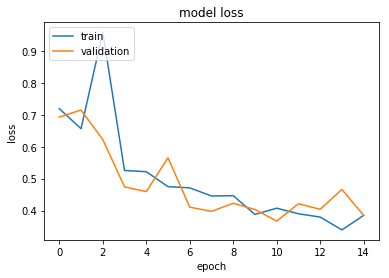

AUGMENTATION


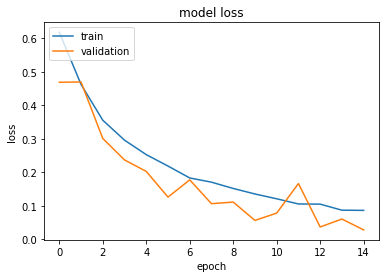

AUGMENTATION GOOGLE


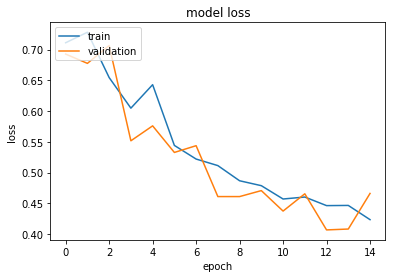

In [0]:
print('NO AUGMENTATION')
plotLosses(history_1)
print('AUGMENTATION')
plotLosses(history_2)
print('AUGMENTATION GOOGLE')
plotLosses(history_3)

In [0]:
# MODEL WITHOUT AUGMENTATION
score = model_aug.evaluate(x_test, y_test, batch_size=128, verbose=0)
y_pred = model_aug.predict_classes(x_test)
print('Model without augmentation --> Loss: {} Accuracy: {}'.format(score[0], score[1]))
array= confusion_matrix(np.argmax(y_test, axis=1), y_pred)
df_cm = pd.DataFrame(array, index = [class_name[i] for i in range(2)],
                  columns = [class_name[i] for i in range(2)])
fig = sn.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g')
fig.set(xlabel='Predicted Label',ylabel='True Label');

Model with augmentation --> Loss: 0.366795729637146 Accuracy: 0.8360000009536743


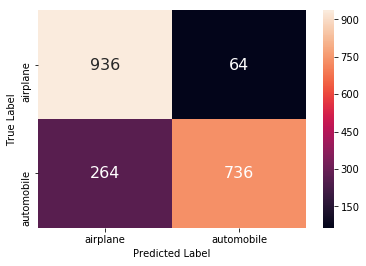

In [0]:
# MODEL WITH AUGMENTATION
score = model.evaluate(x_test, y_test, batch_size=128, verbose=0)
y_pred = model.predict_classes(x_test)
print('Model with augmentation --> Loss: {} Accuracy: {}'.format(score[0], score[1]))
array= confusion_matrix(np.argmax(y_test, axis=1), y_pred)
df_cm = pd.DataFrame(array, index = [class_name[i] for i in range(2)],
                  columns = [class_name[i] for i in range(2)])
fig = sn.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g')
fig.set(xlabel='Predicted Label',ylabel='True Label');

Model with augmentation --> Loss: 0.4285606744289398 Accuracy: 0.8674999995231628


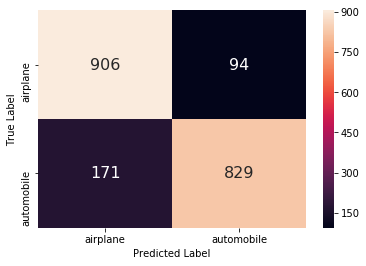

In [0]:
# MODEL WITH GOOGLE'S AUGMENTATION
score = model_google.evaluate(x_test, y_test, batch_size=128, verbose=0)
y_pred = model_google.predict_classes(x_test)
print('Model with augmentation --> Loss: {} Accuracy: {}'.format(score[0], score[1]))
array= confusion_matrix(np.argmax(y_test, axis=1), y_pred)
df_cm = pd.DataFrame(array, index = [class_name[i] for i in range(2)],
                  columns = [class_name[i] for i in range(2)])
fig = sn.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g')
fig.set(xlabel='Predicted Label',ylabel='True Label');

# This section puts everything together to generate the experiments

In [0]:
# TO capture output of DeepAugment
import io
from contextlib import redirect_stdout

f = io.StringIO()

In [0]:
def comparative_aug_notaug_googleaug(n_classes=2, auto_augmentation_iterations = 40 ,dataset_size_per_clas = 500):
  '''This function creates the dataset and trains and tests the model with different scenarios. Not augmented data, 
  automatically augmented data and augmented data using policies that google researchers found as best for this dataset. 
  The function returns all the relevant information obtained from the experiment.'''
  
  # Total length of the dataset
  length_dataset = dataset_size_per_clas*n_classes
  
  # Initializing the models
  model_aug = NN(n_classes)
  model = NN(n_classes)
  model_google = NN(n_classes)

  
  # Configuration for the DeepAugment
  
  my_config = {
      "model": 'basiccnn',
      "method": "bayesian_optimization",
      "train_set_size": dataset_size_per_clas,
      "opt_samples": 2,
      "opt_last_n_epochs": 2,
      "opt_initial_points": 10,
      "child_epochs": 30,
      "child_first_train_epochs": 0,
      "child_batch_size": 128
  }

  # Creating train test split for augmentation
  print('Dataset for training DeepAugment:')
  (x_train, y_train), (x_test, y_test) = train_test_split(augment=True, length_dataset = length_dataset, n_classes = n_classes)
  # Initializing DeepAugment
  deepaug = DeepAugment(images = x_train, labels = y_train, config = my_config)
  y_test = np_utils.to_categorical(y_test, n_classes)

  # Finding best policies for the dataset provided
  best_policies = deepaug.optimize(auto_augmentation_iterations)

  # Formating the best policies
  a = list(best_policies.iloc[0][1:-2])
  print('Best policies found for this dataset: ', a)

  # Creating the training dataset by applying the augmentation techniques found as best
  print('Applying policies...')
  train = augment_by_policy(x_train, y_train, *a)
  x_train_aug = train['X_train']
  y_train_aug = train['y_train']  
  
  y_train_aug = np_utils.to_categorical(y_train_aug, n_classes)
  y_train_cat = np_utils.to_categorical(y_train, n_classes)
  
  print('Training first model without any Augmentation')
  # Training the models, one that uses augmented data and one that uses the training data without any preprocessing
  history_1 = model.fit(x_train, y_train_cat, batch_size=128, epochs=30, verbose=2, validation_split=0.1)
  
  print('Training second model with DeepAugmentation policies')
  history_2 = model_aug.fit(x_train_aug, y_train_aug, batch_size=128, epochs=30, verbose=2, validation_split=0.1)
  
  print('Applying AutoAugment policies to the data:')
  (x_train, y_train), (x_test, y_test) = train_test_split(length_dataset = length_dataset, transformed = True, n_classes = n_classes)
  print('Training third model with AutoAugment policies')
  history_3 = model_google.fit(x_train, y_train, batch_size=128, epochs=30, verbose=2, validation_split=0.1)
  
  model.save('model_{}_{}.h5'.format(n_classes, dataset_size_per_clas))
  model_aug.save('model_aug_{}_{}_{}.h5'.format(n_classes, dataset_size_per_clas, auto_augmentation_iterations))
  model_google.save('model_google_{}_{}.h5'.format(n_classes, dataset_size_per_clas))
  return a, model, model_aug, model_google

In [20]:
# Experiments:
n_classes_experiment = [8,7,3]
dataset_size_per_clas_experiment = [100,200,300,400,500]
df = pd.DataFrame(columns = ['Type','Number_of_classes', 'Size_per_class', 'Accuracy', 'Loss', 'Best_Policies']) 
for n_classes in n_classes_experiment:
  for dataset_size_per_clas in dataset_size_per_clas_experiment:
    print('GETTING x_test')
    with redirect_stdout(f):
      (x_train, y_train), (x_test, y_test) = train_test_split(length_dataset = n_classes*dataset_size_per_clas, n_classes = n_classes)
    print('Creating models with the following params:\n\
    {} Number of classes\n\
    {} Size of the dataset per class\n'.format(n_classes, dataset_size_per_clas))
    a,model, model_aug, model_google = comparative_aug_notaug_googleaug(dataset_size_per_clas = dataset_size_per_clas, n_classes = n_classes)
    print('Evaluating models and adding results to a Dataframe...')
    score1 = model.evaluate(x_test, y_test, batch_size=128, verbose=0)
    score2 = model_aug.evaluate(x_test, y_test, batch_size=128, verbose=0)
    score3 = model_google.evaluate(x_test, y_test, batch_size=128, verbose=0)
    df = df.append({'Type': 'No Augmentation', 
           'Number_of_classes': n_classes, 
           'Size_per_class': dataset_size_per_clas, 
           'Accuracy': score1[1],
           'Loss': score1[0]}, ignore_index=True)
    df = df.append({'Type': 'DeepAugmentation', 
           'Number_of_classes': n_classes, 
           'Size_per_class': dataset_size_per_clas, 
           'Accuracy': score2[1],
           'Loss': score2[0],
           'Best_Policies': a}, ignore_index=True)
    df = df.append({'Type': 'AutoAugmentation', 
           'Number_of_classes': n_classes, 
           'Size_per_class': dataset_size_per_clas, 
           'Accuracy': score3[1],
           'Loss': score3[0]}, ignore_index=True)
    print(list(df.iloc[-1]), list(df.iloc[-2]), list(df.iloc[-3]))
    
df

GETTING x_test
Creating models with the following params:
    8 Number of classes
    100 Size of the dataset per class

Dataset for training DeepAugment:
CLASSES SPLIT CONTAINS:
  800 total samples
  With 8 classes 
  That have the following distribution: [102 112  99  93 100  85 107 102]
Using 100 training images
BasicCNN model built as child model.
 Model summary:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_103 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_104 (Activation)  (None, 30, 30, 32)        0         
____________________________________

KeyboardInterrupt: ignored

In [0]:
df.to_csv('Experiments_8_7_3_and_100_200_300_400_500')

In [0]:
from google.colab import files
files_to_download = ['model_{}_{}.h5'.format(cl, size) for cl in n_classes_experiment for size in dataset_size_per_clas_experiment]
files_to_download.extend(['model_aug_{}_{}.h5'.format(cl, size) for cl in n_classes_experiment for size in dataset_size_per_clas_experiment])
files_to_download.extend(['model_google_{}_{}.h5'.format(cl, size) for cl in n_classes_experiment for size in dataset_size_per_clas_experiment])
files_to_download = ' '.join(files_to_download)
os.system('zip '+"models.zip "+files_to_download)

0

In [0]:
policies, model_1, model_2 = comparative_aug_notaug(auto_augmentation_iterations = 30 ,dataset_size_per_clas = 200)

Model without augmentation --> Loss: 0.4365126724243164 Accuracy: 0.8125


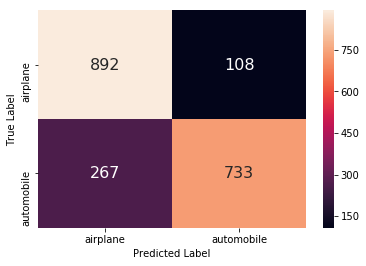

In [0]:
# MODEL WITHOUT AUGMENTATION
score = model_1.evaluate(x_test, y_test, batch_size=128, verbose=0)
y_pred = model_1.predict_classes(x_test)
print('Model without augmentation --> Loss: {} Accuracy: {}'.format(score[0], score[1]))
array= confusion_matrix(np.argmax(y_test, axis=1), y_pred)
df_cm = pd.DataFrame(array, index = [class_name[i] for i in range(2)],
                  columns = [class_name[i] for i in range(2)])
fig = sn.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g')
fig.set(xlabel='Predicted Label',ylabel='True Label');

Model without augmentation --> Loss: 0.6015352921485901 Accuracy: 0.68


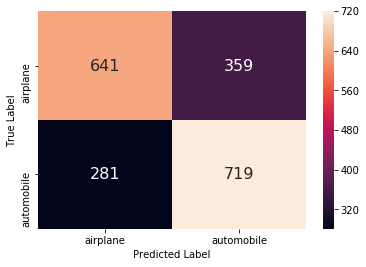

In [0]:
# MODEL WITH AUGMENTATION
score = model_2.evaluate(x_test, y_test, batch_size=128, verbose=0)
y_pred = model_2.predict_classes(x_test)
print('Model with augmentation --> Loss: {} Accuracy: {}'.format(score[0], score[1]))
array= confusion_matrix(np.argmax(y_test, axis=1), y_pred)
df_cm = pd.DataFrame(array, index = [class_name[i] for i in range(2)],
                  columns = [class_name[i] for i in range(2)])
fig = sn.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g')
fig.set(xlabel='Predicted Label',ylabel='True Label');

## Showing applied policy

In [0]:
from augmenter import transform
(x_train, y_train), (x_test, y_test) = train_test_split(augment=True, length_dataset=1)

(2000, 32, 32, 3)

/usr/local/lib/python3.6/dist-packages/imgaug/augmenters/meta.py:464: UserWarning: You provided a numpy array of shape (32, 32, 3) as input to augment_images(), which was interpreted as (N, H, W). The last dimension however has value 1 or 3, which indicates that you provided a single image with shape (H, W, C) instead. If that is the case, you should use augment_image(image) or augment_images([image]), otherwise you will not get the expected augmentations.
  "you will not get the expected augmentations." % (images_copy.shape,))


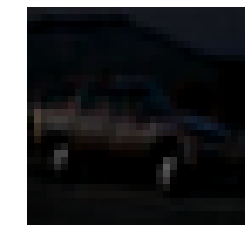

In [0]:
policy = ['horizontal-flip', 0.902, 'rotate', 0.254, 'shear', 0.06, 'rotate', 0.244, 'horizontal-flip', 0.858, 'emboss', 0.768, 'crop', 0.249, 'dropout', 0.993, 'emboss', 0.31, 'gamma-contrast', 0.771]
img1 = transform(policy[0], policy[1], np.array([x_train[0]]))[0]
img1 = transform(policy[2], policy[3], [img1])[0]
img2 = transform(policy[4], policy[5], np.array([x_train[0]]))[0]
img2 = transform(policy[6], policy[7], [img2])[0]
img3 = transform(policy[8], policy[9], np.array([x_train[0]]))[0]
img3 = transform(policy[10], policy[11], [img3])[0]
img4 = transform(policy[12], policy[13], np.array([x_train[0]]))[0]
img4 = transform(policy[14], policy[15], [img4])[0]
img5 = transform(policy[16], policy[17], np.array([x_train[0]]))[0]
img5 = transform(policy[18], policy[19], img5)
draw_img(img5, y_train[0], title=False)

### This is for using tiny dataset

In [0]:
def get_annotations_map():
    valAnnotationsPath = './tiny-imagenet-200/val/val_annotations.txt'
    valAnnotationsFile = open(valAnnotationsPath, 'r')
    valAnnotationsContents = valAnnotationsFile.read()
    valAnnotations = {}

    for line in valAnnotationsContents.splitlines():
        pieces = line.strip().split()
        valAnnotations[pieces[0]] = pieces[1]

    return valAnnotations

def load_images(path,num_classes):
    #Load images
    
    print('Loading ' + str(num_classes) + ' classes')

    X_train=np.zeros([num_classes*500,3,64,64],dtype='uint8')
    y_train=np.zeros([num_classes*500], dtype='uint8')

    trainPath=path+'/train'

    print('loading training images...');

    i=0
    j=0
    annotations={}
    for sChild in os.listdir(trainPath):
        sChildPath = os.path.join(os.path.join(trainPath,sChild),'images')
        annotations[sChild]=j
        for c in os.listdir(sChildPath):
            X=np.array(Image.open(os.path.join(sChildPath,c)))
            if len(np.shape(X))==2:
                X_train[i]=np.array([X,X,X])
            else:
                X_train[i]=np.transpose(X,(2,0,1))
            y_train[i]=j
            i+=1
        j+=1
        if (j >= num_classes):
            break

    print('finished loading training images')

    val_annotations_map = get_annotations_map()

    X_test = np.zeros([num_classes*50,3,64,64],dtype='uint8')
    y_test = np.zeros([num_classes*50], dtype='uint8')


    print('loading test images...')

    i = 0
    testPath=path+'/val/images'
    for sChild in os.listdir(testPath):
        if val_annotations_map[sChild] in annotations.keys():
            sChildPath = os.path.join(testPath, sChild)
            X=np.array(Image.open(sChildPath))
            if len(np.shape(X))==2:
                X_test[i]=np.array([X,X,X])
            else:
                X_test[i]=np.transpose(X,(2,0,1))
            y_test[i]=annotations[val_annotations_map[sChild]]
            i+=1
        else:
            pass


    print('finished loading test images'+str(i))

    return X_train,y_train,X_test,y_test


path='./tiny-imagenet-200'
X_train,Y_train,X_test,Y_test=load_images(path,2)


fig1 = plt.figure()
fig1.suptitle('Train data')
ax1 = fig1.add_subplot(221)
ax1.axis("off")
ax1.imshow(np.transpose(X_train[0],(1,2,0)))
print(Y_train[0])
ax2 = fig1.add_subplot(222)
ax2.axis("off")
ax2.imshow(np.transpose(X_train[499],(1,2,0)))
print(Y_train[499])
ax3 = fig1.add_subplot(223)
ax3.axis("off")
ax3.imshow(np.transpose(X_train[500],(1,2,0)))
print(Y_train[500])
ax4 = fig1.add_subplot(224)
ax4.axis("off")
ax4.imshow(np.transpose(X_train[919],(1,2,0)))
print(Y_train[919])

plt.show()

fig2 = plt.figure()
fig2.suptitle('Test data')
ax1 = fig2.add_subplot(221)
ax1.axis("off")
ax1.imshow(np.transpose(X_test[0],(1,2,0)))
print(Y_test[0])
ax2 = fig2.add_subplot(222)
ax2.axis("off")
ax2.imshow(np.transpose(X_test[49],(1,2,0)))
print(Y_test[49])
ax3 = fig2.add_subplot(223)
ax3.axis("off")
ax3.imshow(np.transpose(X_test[50],(1,2,0)))
print(Y_test[50])
ax4 = fig2.add_subplot(224)
ax4.axis("off")
ax4.imshow(np.transpose(X_test[99],(1,2,0)))
print(Y_test[99])

plt.show()

X_train = X_train.reshape((X_train.shape[0], 64, 64, 3))


(50000, 32, 32, 3)